# ex-02 Test Reliability Gamma 

In [1]:
import numpy as np
from reliability.Distributions import Gamma_Distribution
from reliability.Fitters import Fit_Gamma_2P
from reliability.Other_functions import make_right_censored_data, histogram
import matplotlib.pyplot as plt

## Reliability gamma


Fit_Gamma_2P parameters using 10 samples: 
Alpha: 19.425920340397617 
Beta: 4.690157835814873

Fit_Gamma_2P parameters using 100 samples: 
Alpha: 36.26422185573061 
Beta: 3.2929367831647136

Fit_Gamma_2P parameters using 1000 samples: 
Alpha: 28.82508715190846 
Beta: 4.062953972369221

Fit_Gamma_2P parameters using 10000 samples: 
Alpha: 30.301283885953364 
Beta: 3.9600851294712434


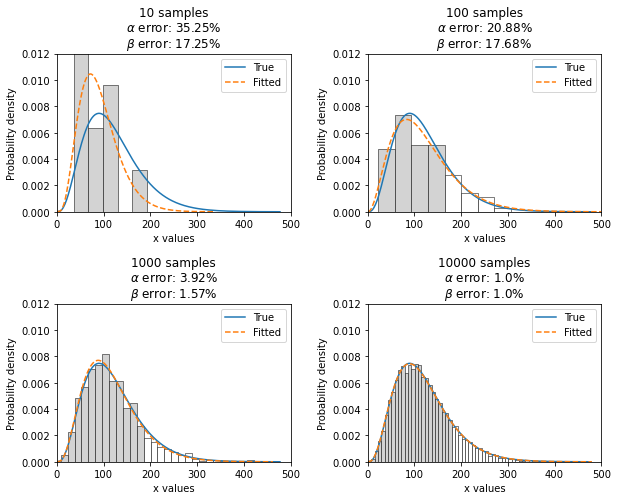

In [2]:
a = 30
b = 4
threshold = 180  # this is used when right censoring the data
trials = [10, 100, 1000, 10000]
subplot_id = 221
plt.figure(figsize=(9, 7))
for sample_size in trials:
    dist = Gamma_Distribution(alpha=a, beta=b)
    raw_data = dist.random_samples(sample_size, seed=2)  # create some data. Seeded for repeatability
    data = make_right_censored_data(raw_data, threshold=threshold)  # right censor the data
    gf = Fit_Gamma_2P(failures=data.failures, right_censored=data.right_censored, show_probability_plot=False, print_results=False)  # fit the Gamma_2P distribution
    print('\nFit_Gamma_2P parameters using', sample_size, 'samples:', '\nAlpha:', gf.alpha, '\nBeta:', gf.beta)  # print the results
    plt.subplot(subplot_id)
    histogram(raw_data,white_above=threshold) # plots the histogram using optimal bin width and shades the right censored part white
    dist.PDF(label='True')  # plots the true distribution
    gf.distribution.PDF(label='Fitted', linestyle='--')  # plots the fitted Gamma_2P distribution
    plt.title(str(str(sample_size) + ' samples\n' + r'$\alpha$ error: ' + str(round(abs(gf.alpha - a) / a * 100, 2)) + '%\n' + r'$\beta$ error: ' + str(round(abs(gf.beta - b) / b * 100, 2)) + '%'))
    plt.ylim([0, 0.012])
    plt.xlim([0, 500])
    plt.legend()
    subplot_id += 1
plt.subplots_adjust(left=0.11, bottom=0.08, right=0.95, top=0.89, wspace=0.33, hspace=0.58)
plt.show()

## Compare with scipy.stats.gamma

In [3]:
import scipy.stats as stats    
alpha = 3
beta = 22
data = stats.gamma.rvs(alpha, scale=beta, size=1000)   

In [4]:
%%time
#for i in np.arange(191*384):
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(data, alpha, floc=0)
print('\nAlpha:', fit_alpha, '\nBeta:', fit_beta)


Alpha: 2.7440078599742814 
Beta: 23.989423344584146
Wall time: 1 ms


In [5]:
%%time
#for i in np.arange(191*384):
gf = Fit_Gamma_2P(failures=data, show_probability_plot=False, print_results=False)
#print('\nAlpha:', gf.results, '\nBeta:', gf.beta)

Wall time: 89 ms
